# Determining the optimal number of clusters: 3 must known methods
source: http://www.sthda.com/english/wiki/determining-the-optimal-number-of-clusters-3-must-known-methods-unsupervised-machine-learning

The first step in clustering analysis is to assess whether the dataset is clusterable. This process is defined as the **assessing of clustering tendency** or the **feasibility of the clustering analysis**.

Partitioning methods, such as **k-means** clustering require also the users to specify the number of clusters to be generated. One fundamental question is: If the data is clusterable, then how to choose the right number of expected clusters (k)? 

## 1 Required packages

The following package will be used:

- **cluster** for computing **pam** and for analyzing cluster silhouettes
- **factoextra** for visualizing clusters using **ggplot2** plotting system
- **NbClust** for finding the optimal number of clusters

**Partitioning Around Medoids (PAM)** algorithm is more robust to noise and outliers as compared to **k-means** because it minimizes a sum of pairwise dissimilarities instead of a sum of squared Euclidean distances. A **medoid** can be defined as the object of a cluster whose average dissimilarity to all the objects in the cluster is minimal. i.e. it is a most centrally located point in the cluster.

In [1]:
packages = c("factoextra", "cluster", "NbClust")

for (package in packages) {
    if (!require(package, character.only=T, quietly=T)) {
        install.packages(package, repos="http://cran.us.r-project.org")
        library(package, character.only=T)
    }
}

## 2 Data preparation

The data set iris is used. We start by excluding the species column and scaling the data using the function **scale()**

In [2]:
# Load the data
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
# Remove species column (5) and scale the data
iris.scaled <- scale(iris[, -5])

## 3 Example of partitioning method results (flat clustering)

The functions **means()** [in **stats** package] and **pam()** [in **cluster** package] are described in this section. We’ll split the data into 3 clusters as follow:

In [4]:
# K-means clustering
set.seed(123)
km.res <- kmeans(iris.scaled, 3, nstart = 25)
# k-means group number of each observation
km.res$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3
 [75] 3 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

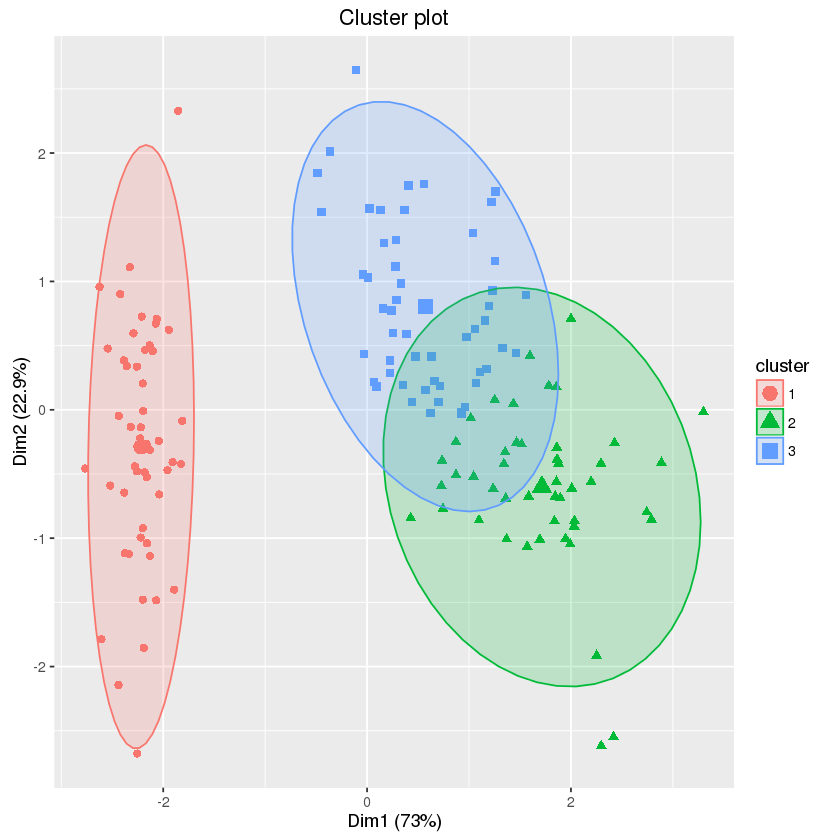

In [5]:
# Visualize k-means clusters
fviz_cluster(km.res, data = iris.scaled, geom = "point", stand = FALSE, frame.type = "norm")

In [6]:
# PAM clustering
pam.res <- pam(iris.scaled, 3)
pam.res$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3
 [75] 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 2 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

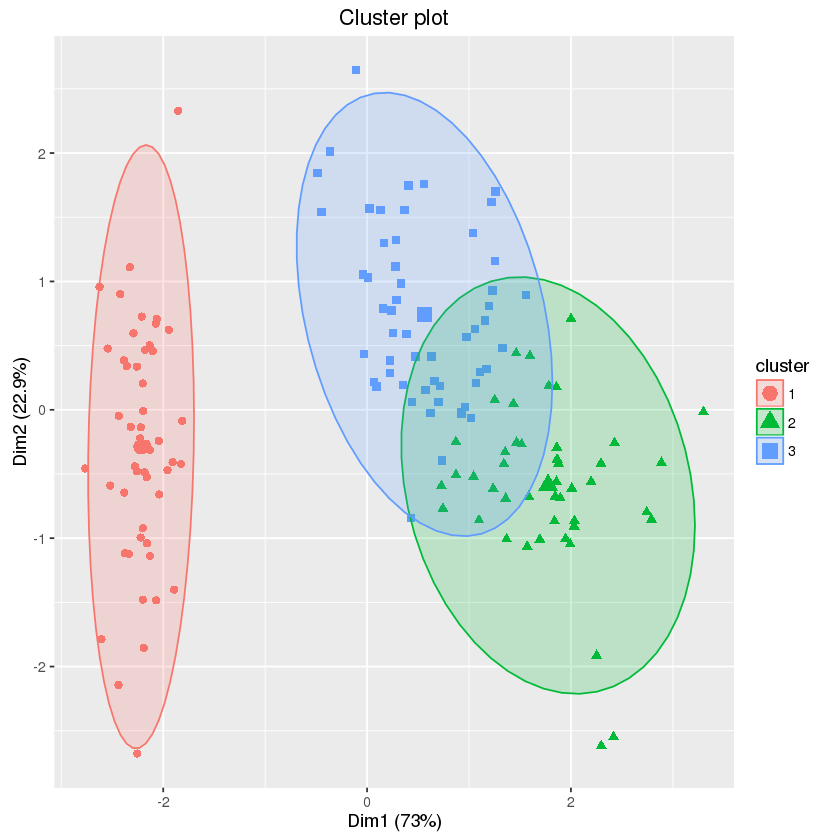

In [7]:
# Visualize pam clusters
fviz_cluster(pam.res, stand = FALSE, geom = "point",frame.type = "norm")

## 4 Example of hierarchical clustering results

The built-in R function **hclust()** is used:

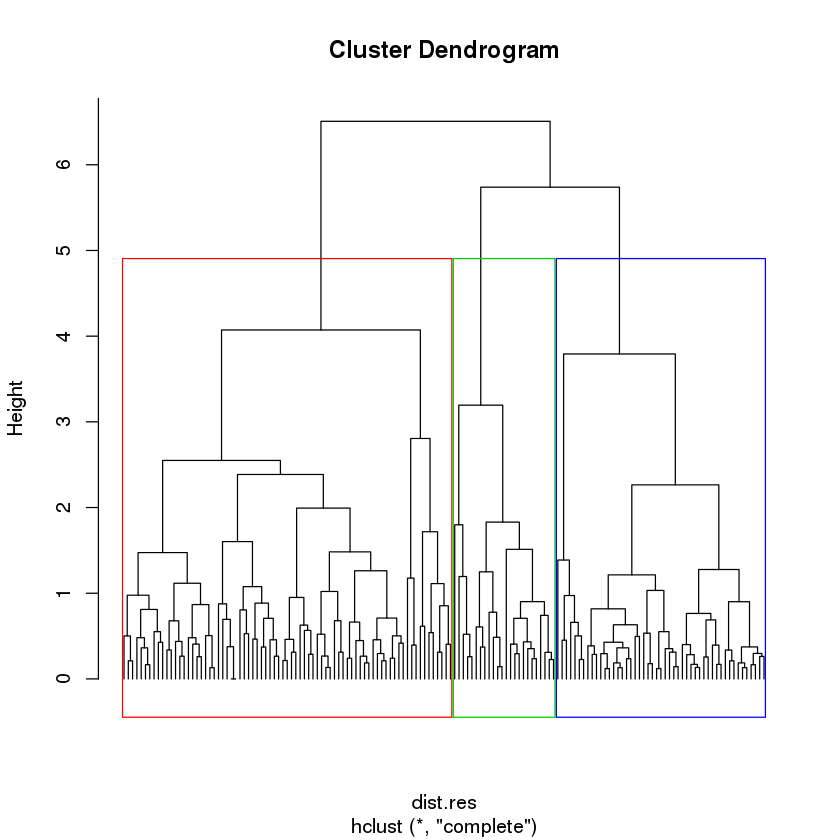

In [8]:
# Compute pairewise distance matrices
dist.res <- dist(iris.scaled, method = "euclidean")

# Hierarchical clustering results
hc <- hclust(dist.res, method = "complete")

# Visualization of hclust
plot(hc, labels = FALSE, hang = -1)

# Add rectangle around 3 groups
rect.hclust(hc, k = 3, border = 2:4) 

In [9]:
# Cut into 3 groups
hc.cut <- cutree(hc, k = 3)
head(hc.cut, 20)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

## 5 Three popular methods for determining the optimal number of clusters

In this section we describe the three most popular methods including: 
- Elbow method, 
- silhouette method and 
- gap statistic.

### 5.1 Elbow method

#### Concept

Recall that, the basic idea behind partitioning methods, such as **k-means clustering**, is to define clusters such that the **total intra-cluster variation** (known as **total within-cluster variation** or total **within-cluster sum of square**) is minimized:

$$ minimize (\sum_{k=1}^k\ W(C_{k})) $$

Where $C_{k}$ is the $k_{th}$ cluster and $W(C_{k})$ is the **within-cluster variation**.

#### Algorithm

The optimal number of clusters can be defined as follow:
1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters
2. For each k, calculate the total within-cluster sum of square (**wss**)
3. Plot the curve of **wss** according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

#### Elbow method for k-means clustering

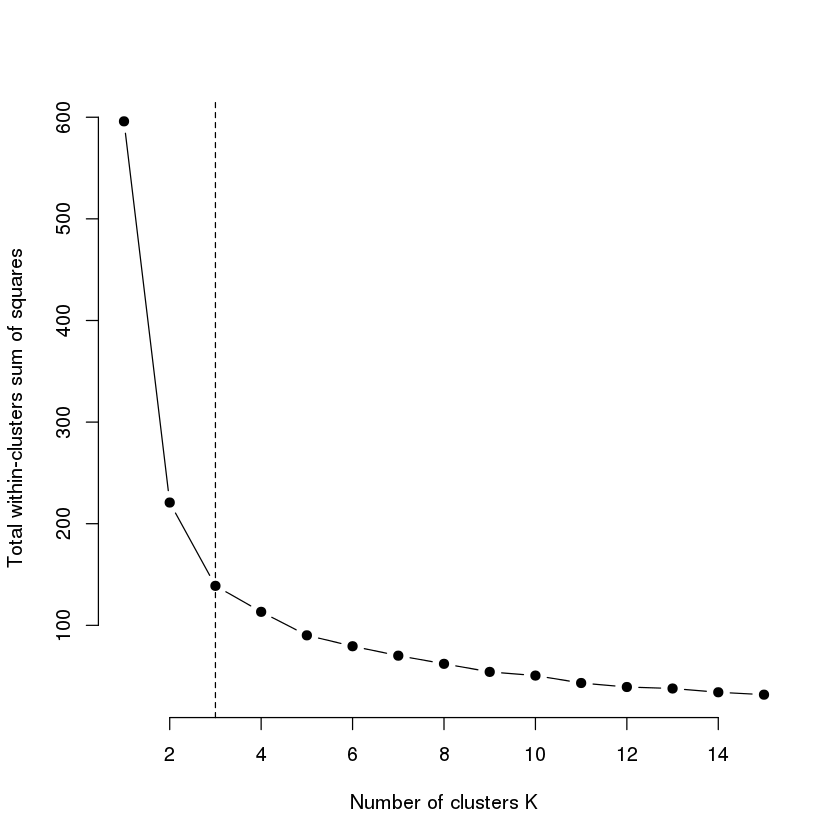

In [11]:
set.seed(123)

# Compute and plot wss for k = 2 to k = 15
k.max <- 15 # Maximal number of clusters
data <- iris.scaled
wss <- sapply(1:k.max, 
              function(k) { kmeans(data, k, nstart=10 )$tot.withinss})

plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")
abline(v = 3, lty =2)

<font color='green'>The elbow method suggests 3 cluster solutions</font>

The elbow method is implemented in **factoextra** package and can be easily computed using the function **fviz_nbclust()**, which format is:

**fviz_nbclust(x, FUNcluster, method = c("silhouette", "wss"))**

- **x**: numeric matrix or data frame
- **FUNcluster**: a partitioning function such as kmeans, pam, clara etc
- **method**: the method to be used for determining the optimal number of clusters.

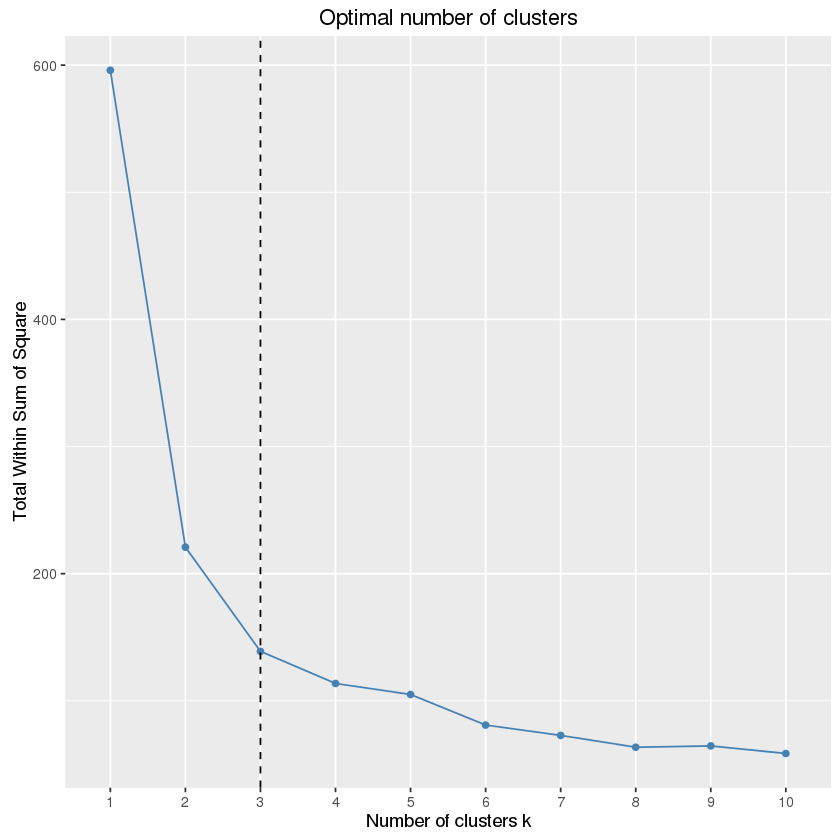

In [12]:
fviz_nbclust(iris.scaled, kmeans, method = "wss") +
    geom_vline(xintercept = 3, linetype = 2)

<font color='green'>Three clusters are suggested.</font>

#### Elbow method for PAM clustering

It’s possible to use the function **fviz_nbclust()** as follow:

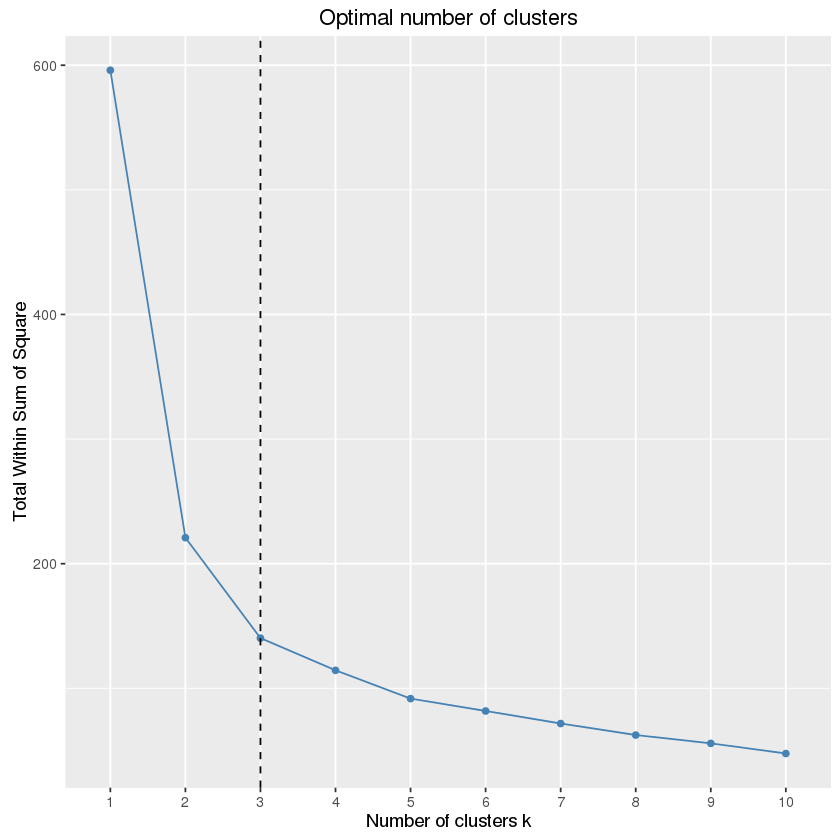

In [13]:
fviz_nbclust(iris.scaled, pam, method = "wss") +
  geom_vline(xintercept = 3, linetype = 2)

<font color='green'>Three clusters are suggested.</font>

#### Elbow method for hierarchical clustering

We’ll use a helper function **hcut()** [in **factoextra** package] which will compute hierarchical clustering (HC) algorithm and cut the dendrogram in k clusters:

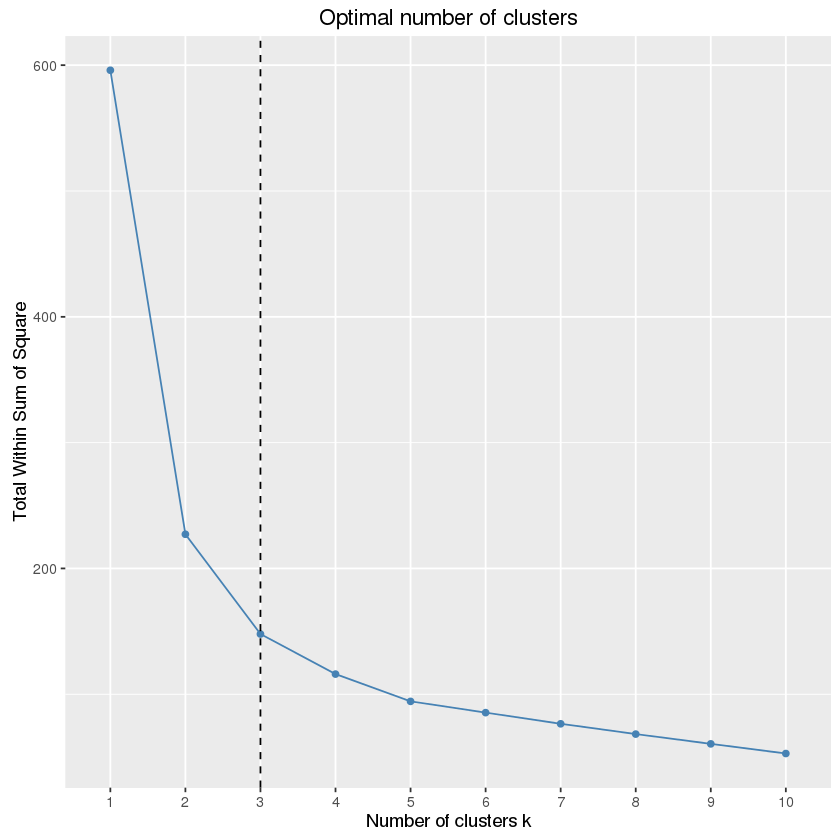

In [15]:
fviz_nbclust(iris.scaled, hcut, method = "wss") +
  geom_vline(xintercept = 3, linetype = 2)

<font color='green'>Three clusters are suggested.</font>

### 5.2 Average silhouette method

#### Concept

The average silhouette measures the quality of a clustering. It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.

Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw [1990]).

#### Algorithm

The algorithm is similar to the elbow method and can be computed as follow:

1. ompute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters
2. For each k, calculate the average silhouette of observations (**avg.sil**)
3. Plot the curve of **avg.sil** according to the number of clusters k.
4. The location of the maximum is considered as the appropriate number of clusters.

#### Average silhouette method for k-means clustering

The function **silhouette()** [in **cluster** package] is used to compute the average silhouette width.



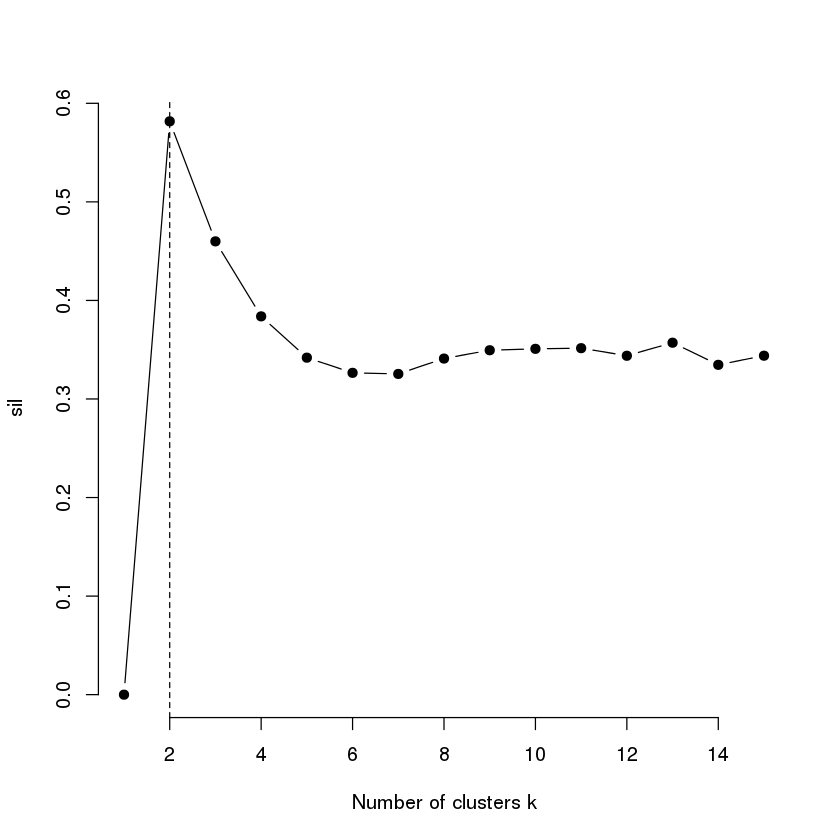

In [5]:
k.max <- 15
data <- iris.scaled
sil <- rep(0, k.max)

# Compute the average silhouette width for 
# k = 2 to k = 15
for(i in 2:k.max){
  km.res <- kmeans(data, centers = i, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(data))
  sil[i] <- mean(ss[, 3])
}

# Plot the  average silhouette width
plot(1:k.max, sil, type = "b", pch = 19, 
     frame = FALSE, xlab = "Number of clusters k")
abline(v = which.max(sil), lty = 2)

number of clusters estimated by optimum average silhouette width: 2 


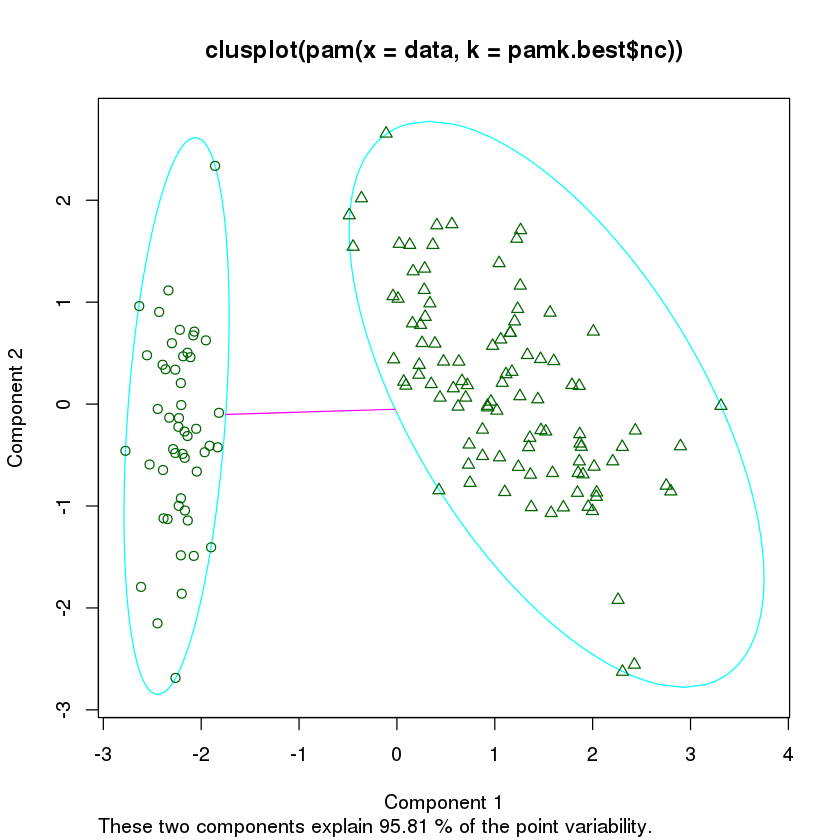

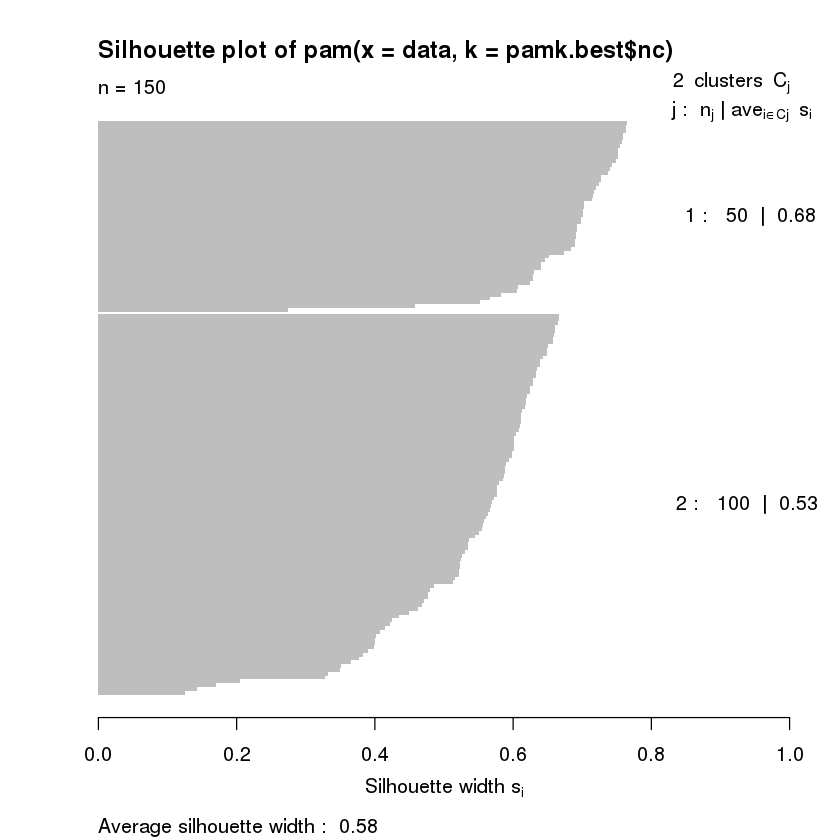

In [6]:
library(fpc)

pamk.best <- pamk(data)
cat("number of clusters estimated by optimum average silhouette width:", pamk.best$nc, "\n")
plot(pam(data, pamk.best$nc))

The function **fviz_nbclust()** [in **factoextra** package] can be also used. It just requires the cluster package to be installed:

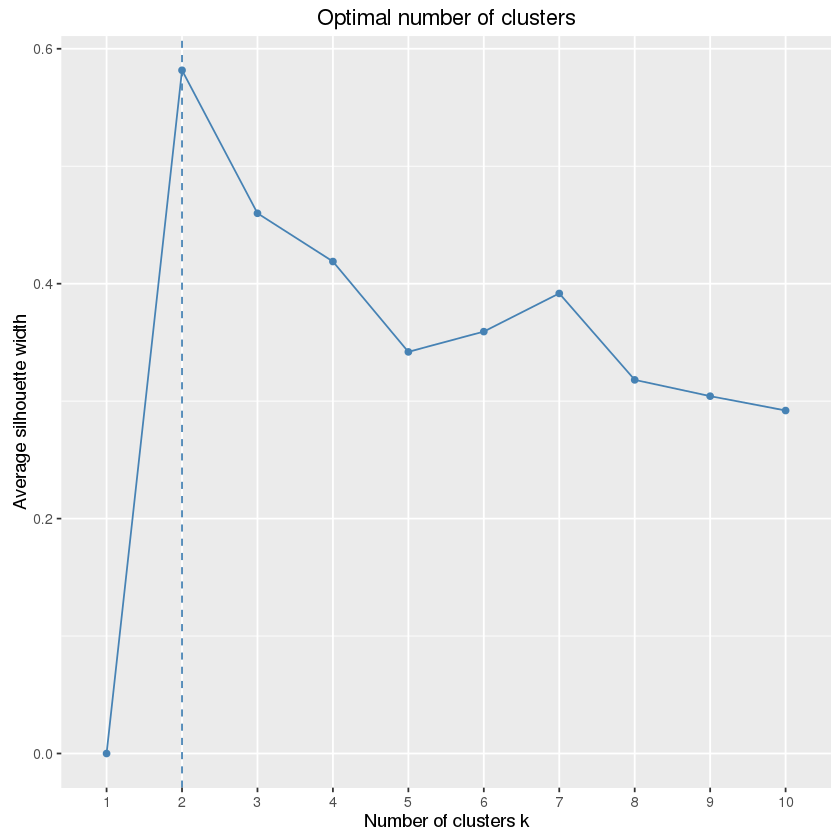

In [17]:
fviz_nbclust(iris.scaled, kmeans, method = "silhouette")

<font color='green'>Two clusters are suggested.</font>

#### Average silhouette method for PAM clustering

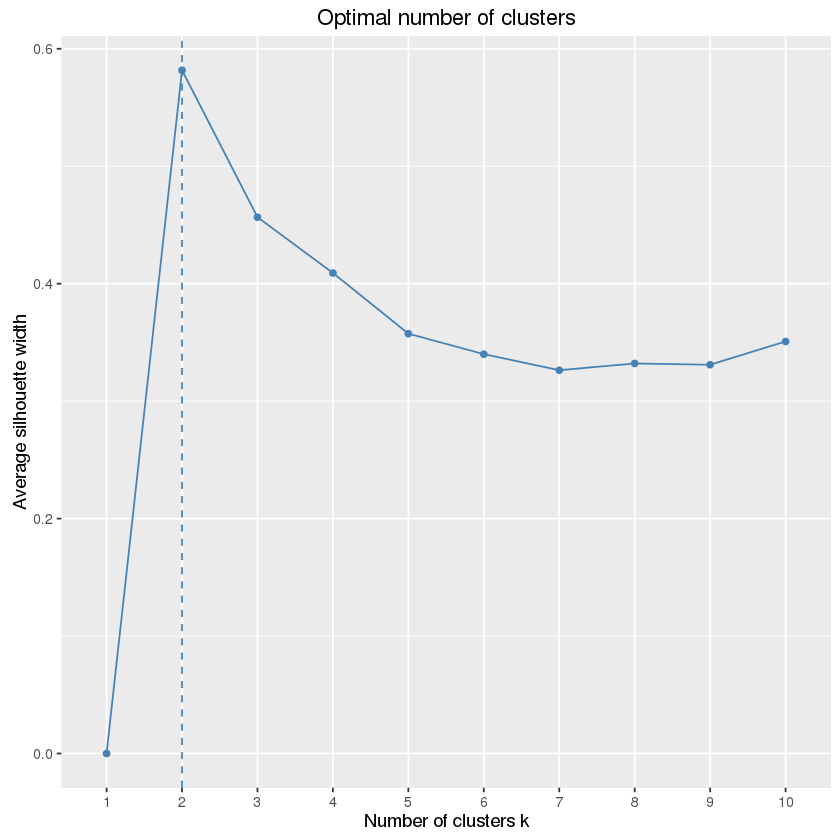

In [18]:
fviz_nbclust(iris.scaled, pam, method = "silhouette")

<font color='green'>Two clusters are suggested.</font>

#### Average silhouette method for hierarchical clustering

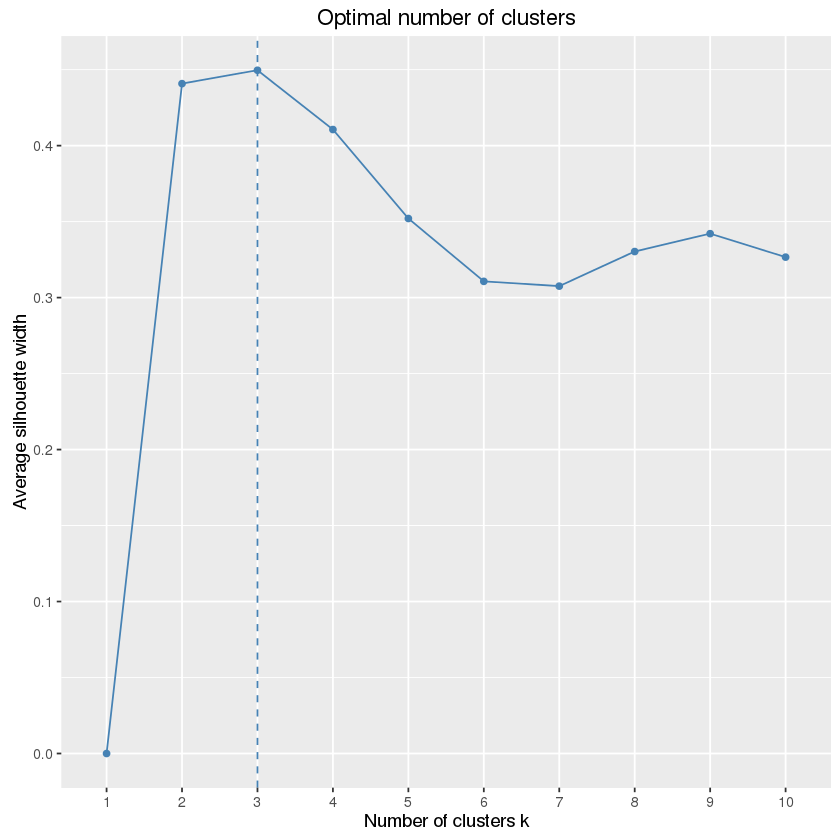

In [19]:
fviz_nbclust(iris.scaled, hcut, method = "silhouette",hc_method = "complete")

<font color='green'>Three clusters are suggested.</font>

### 5.3 Conclusions about elbow and silhouette methods

- Three cluster solutions are suggested using k-means, PAM and hierarchical clustering in combination with the elbow method.
- The average silhouette method gives two cluster solutions using k-means and PAM algorithms. Combining hierarchical clustering and silhouette method returns 3 clusters

<font color='green'>According to these observations, it’s possible to define k = 3 as the optimal number of clusters in the data.</font>

### 5.4 Gap statistic method

#### Concept

The gap statistic compares the total within intracluster variation for different values of k with their expected values under null reference distribution of the data, i.e. a distribution with no obvious clustering.
Recall that, the total within intra-cluster variation for a given k clusters is the total within sum of square $(w_{k})$
The reference dataset is generated using Monte Carlo simulations of the sampling process. That is, for each variable $(x_{i})$ in the data set we compute its range $[min(x_{i}),max(x_{j})]$ and generate values for the n points uniformly from the interval min to max.

<font color='green'>The estimate of the optimal clusters *k* will be value that maximize $Gap_{n}(k)$ (i.e, that yields the largest gap statistic). This means that the clustering structure is far away from the uniform distribution of points.</font>

#### R function for computing the gap statistic

The R function **clusGap()** [in **cluster** package ] can be used to estimate the number of clusters in the data by applying the gap statistic.

A simplified format is:

**clusGap(x, FUNcluster, K.max, B = 100, verbose = TRUE, ...)**

- **x**: numeric matrix or data frame
- **FUNcluster**: a function (e.g.: kmeans, pam, …) which accepts i) a data matrix like x as first argument; ii) the number of clusters desired (k > = 2) as a second argument; and returns a list containing a component named cluster which is a vector of length n=nrow(x)n=nrow(x) of integers in 1:k determining the clustering or grouping of the n observations.
- **K.max**: the maximum number of clusters to consider, must be at least two.
- **B**: the number of Monte Carlo (“bootstrap”) samples.
- **verbose**: if TRUE, the computing progression is shown.
- …: Further arguments for FUNcluster(), see kmeans example below.

<font color="green">**clusGap()** function returns an object of class “clusGap” which main component is **Tab** with **K.max** rows and 4 columns, named “logW”, “E.logW”, “gap” and “SE.sim”. Recall that gap=E.logW−logW and SE.sim is the standard error of gap.</font>

#### Gap statistic for k-means clustering

The R code below shows some example using the **clustGap()** function. 

We’ll use B = 50 to keep the function speedy. Note that, it’s recommended to use B = 500 for your analysis. 


The output of **clusGap()** function can be visualized using the function **fviz_gap_stat()** [in **factoextra**].

In [20]:
set.seed(123)
gap_stat <- clusGap(iris.scaled, FUN = kmeans, nstart = 25, K.max = 10, B = 50)

# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"].
B=50 simulated reference sets, k = 1..10
 --> Number of clusters (method 'firstmax'): 3
          logW   E.logW       gap     SE.sim
 [1,] 4.534565 4.754595 0.2200304 0.02504585
 [2,] 4.021316 4.489687 0.4683711 0.02742112
 [3,] 3.806577 4.295715 0.4891381 0.02384746
 [4,] 3.699263 4.143675 0.4444115 0.02093871
 [5,] 3.589284 4.052262 0.4629781 0.02036366
 [6,] 3.519726 3.972254 0.4525278 0.02049566
 [7,] 3.448288 3.905945 0.4576568 0.02106987
 [8,] 3.398210 3.850807 0.4525967 0.01969193
 [9,] 3.334279 3.802315 0.4680368 0.01905974
[10,] 3.250246 3.759661 0.5094149 0.01928183


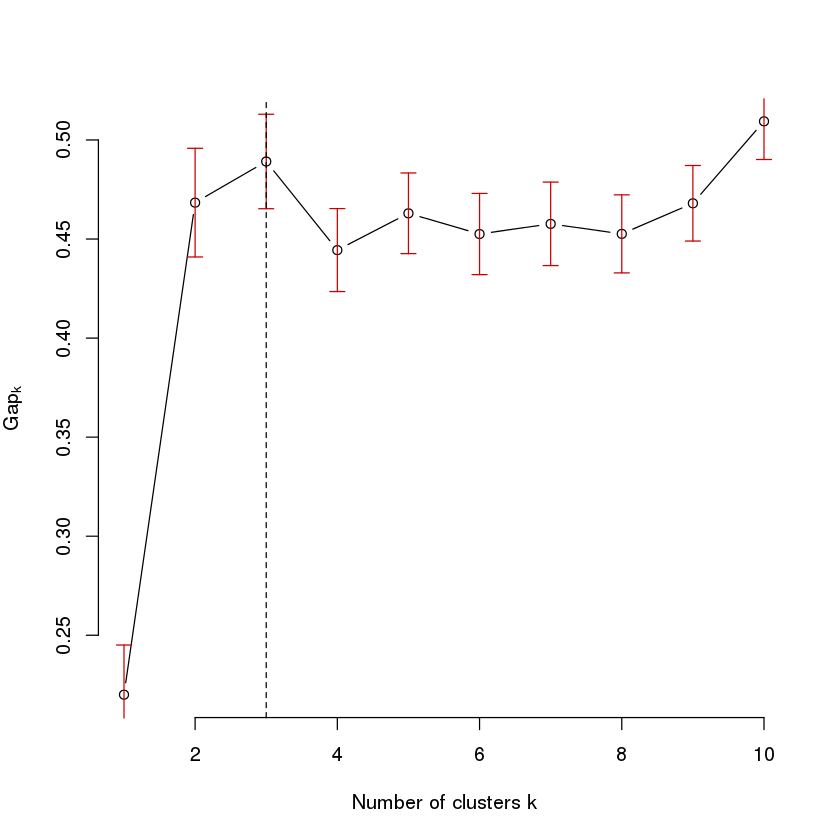

In [21]:
# Base plot of gap statistic
plot(gap_stat, frame = FALSE, xlab = "Number of clusters k")
abline(v = 3, lty = 2)

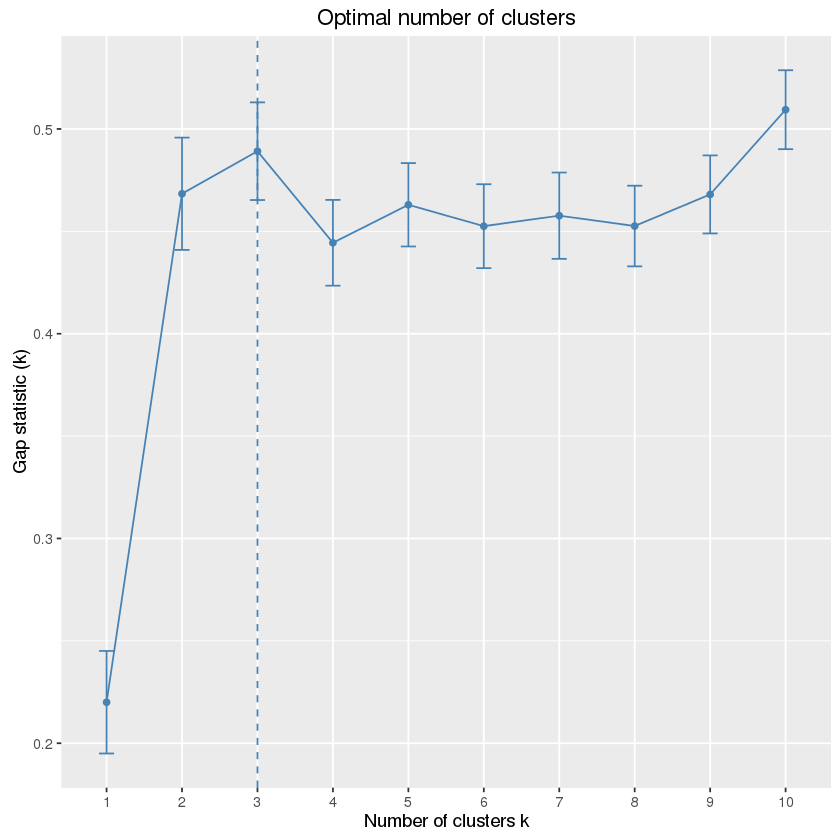

In [22]:
# Use factoextra
fviz_gap_stat(gap_stat)

<font color="green">In our example, the algorithm suggests k = 3</font>

The optimal number of clusters, k, is computed using the “firstmax” method (see **?cluster::maxSE**). The criterion proposed by Tibshirani et al (2001) can be used as follow:

Clustering Gap statistic ["clusGap"].
B=50 simulated reference sets, k = 1..10
 --> Number of clusters (method 'Tibs2001SEmax', SE.factor=1): 2
          logW   E.logW       gap     SE.sim
 [1,] 4.534565 4.754595 0.2200304 0.02504585
 [2,] 4.021316 4.489687 0.4683711 0.02742112
 [3,] 3.806577 4.295715 0.4891381 0.02384746
 [4,] 3.699263 4.143675 0.4444115 0.02093871
 [5,] 3.589284 4.052262 0.4629781 0.02036366
 [6,] 3.519726 3.972254 0.4525278 0.02049566
 [7,] 3.448288 3.905945 0.4576568 0.02106987
 [8,] 3.398210 3.850807 0.4525967 0.01969193
 [9,] 3.334279 3.802315 0.4680368 0.01905974
[10,] 3.250246 3.759661 0.5094149 0.01928183


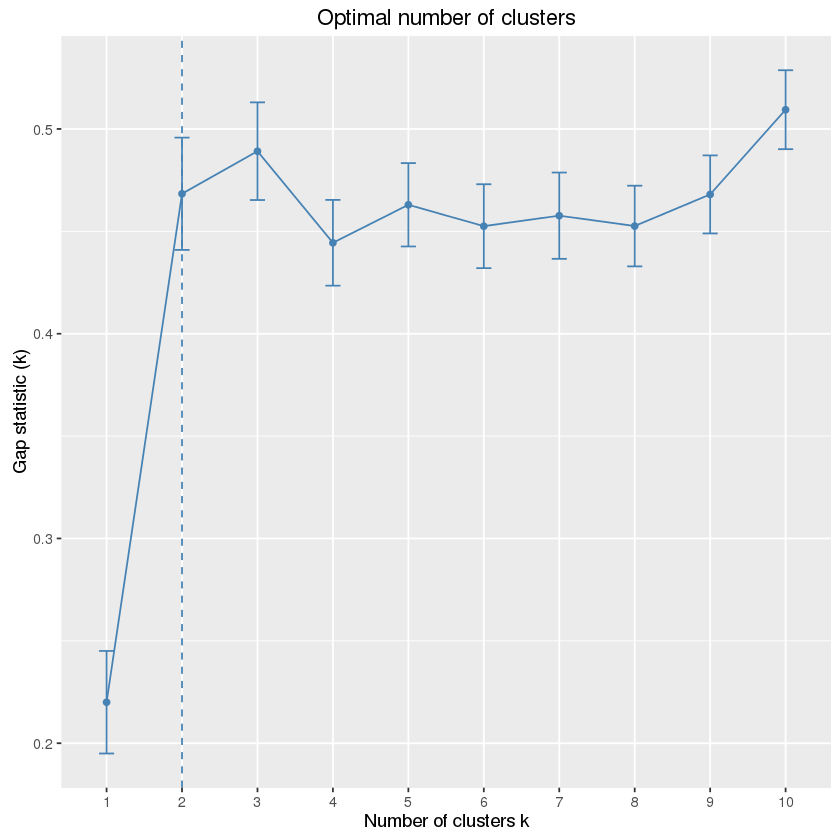

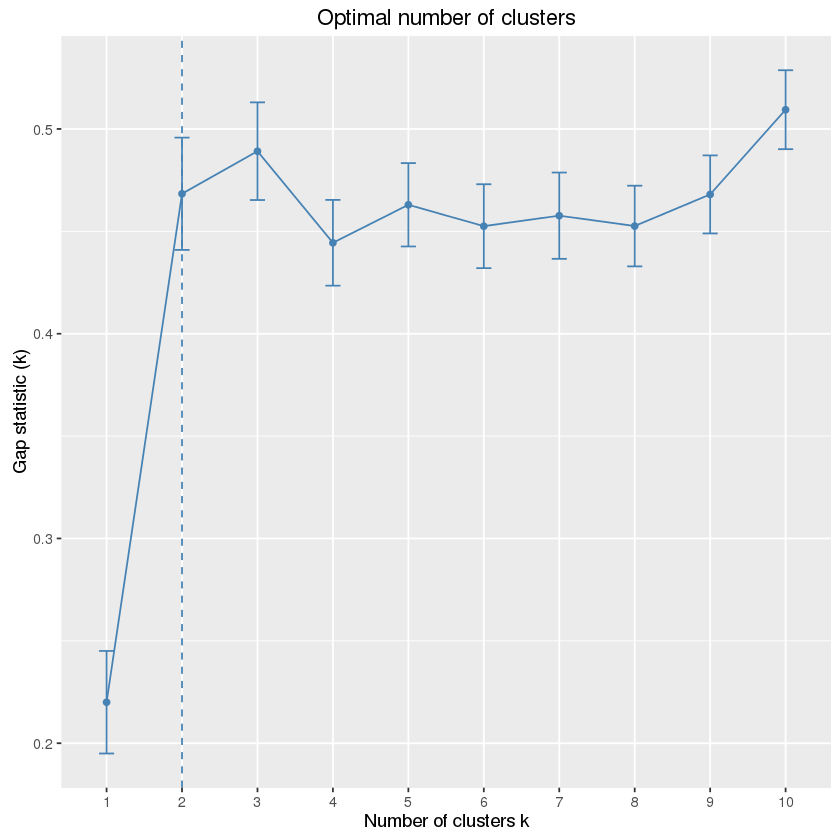

In [23]:
# Print
print(gap_stat, method = "Tibs2001SEmax")
# Plot
fviz_gap_stat(gap_stat, 
              maxSE = list(method = "Tibs2001SEmax"))
# Relaxed the gap test to be within two standard deviations
fviz_gap_stat(gap_stat, 
          maxSE = list(method = "Tibs2001SEmax", SE.factor = 2))

<font color='green'>Tibshirani criterion two clusters suggested.</font>

#### Gap statistic for PAM clustering

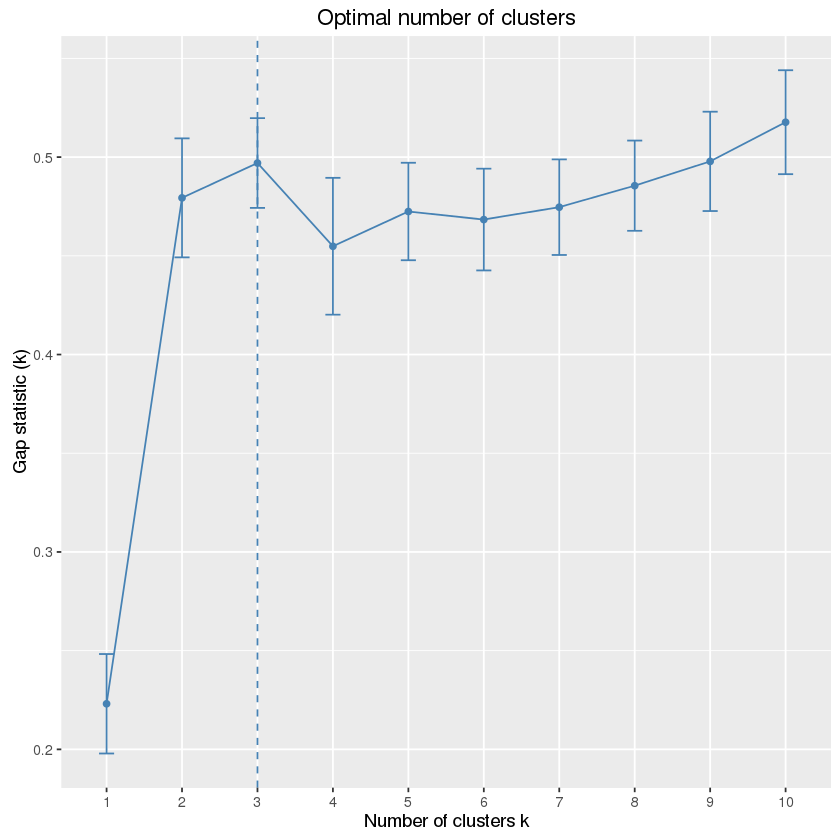

In [24]:
# Compute gap statistic
set.seed(123)
gap_stat <- clusGap(iris.scaled, FUN = pam, K.max = 10, B = 50)
# Plot gap statistic
fviz_gap_stat(gap_stat)

<font color="green">Three cluster solutions are suggested</font>

#### Gap statistic for hierarchical clustering

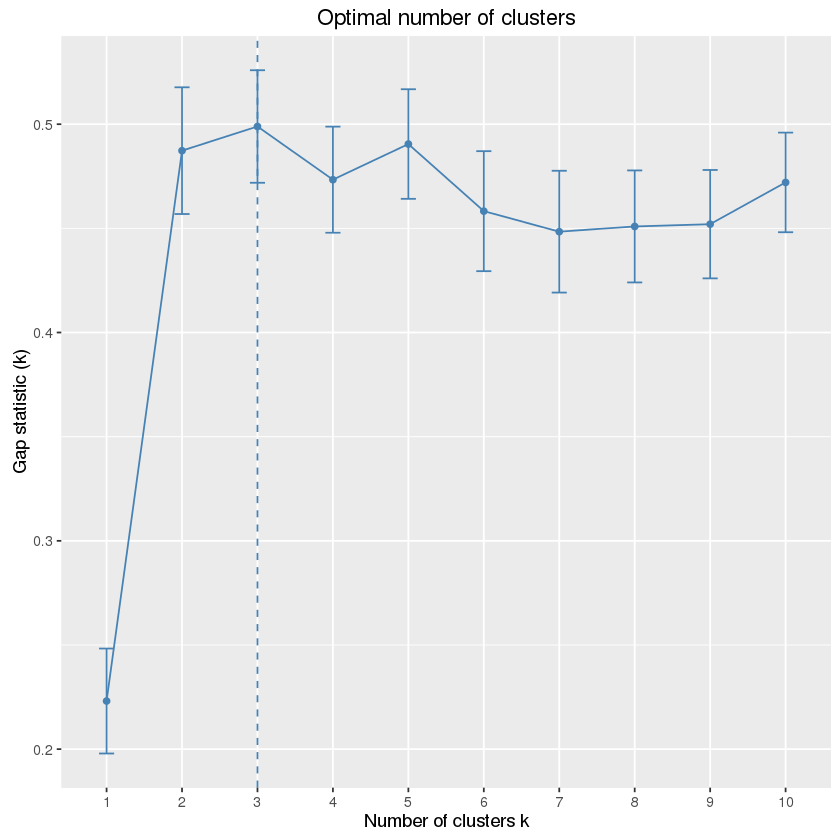

In [25]:
# Compute gap statistic
set.seed(123)
gap_stat <- clusGap(iris.scaled, FUN = hcut, K.max = 10, B = 50)
# Plot gap statistic
fviz_gap_stat(gap_stat)

<font color="green">Three cluster solutions are suggested</font>

## 6 NbClust: A Package providing 30 indices for determining the best number of clusters

### 6.1 Overview of NbClust package

As mentioned in the introduction, many indices have been proposed in the literature for determining the optimal number of clusters in a partitioning of a data set during the clustering process.

**NbClust** package, published by Charrad et al., 2014, provides 30 indices for determining the relevant number of clusters and proposes to users the best clustering scheme from the different results obtained by varying all combinations of number of clusters, distance measures, and clustering methods.

An important advantage of **NbClust** is that the user can simultaneously computes multiple indices and determine the number of clusters in a single function call.

The indices provided in **NbClust** package includes the gap statistic, the silhouette method and 28 other indices described comprehensively in the original paper of Charrad et al., 2014.

### 6.2 NbClust R function

The simplified format of the function **NbClust()** is:

**NbClust(data = NULL, diss = NULL, distance = "euclidean",
        min.nc = 2, max.nc = 15, method = NULL, index = "all")**

- **data**: matrix
- **diss**: dissimilarity matrix to be used. By default, diss=NULL, but if it is replaced by a dissimilarity matrix, - distance should be “NULL”
- **distance**: the distance measure to be used to compute the dissimilarity matrix. Possible values include “euclidean”, “manhattan” or “NULL”.
- **min.nc**, **max.nc**: minimal and maximal number of clusters, respectively
- **method**: The cluster analysis method to be used including “ward.D”, “ward.D2”, “single”, “complete”, “average” and more
- **index**: the index to be calculated including “silhouette”, “gap” and more.

The value of **NbClust()** function includes the following elements:

- **All.index**: Values of indices for each partition of the dataset obtained with a number of clusters between min.nc and max.nc
- **All.CriticalValues**: Critical values of some indices for each partition obtained with a number of clusters between min.nc and max.nc
- **Best.nc**: Best number of clusters proposed by each index and the corresponding index value
- **Best.partition**: Partition that corresponds to the best number of clusters

### 6.3 Usage

Note that, user can request **indices** one by one, by setting the argument index to the name of the index of interest, for example **index = “gap”**.

In this case, **NbClust** function displays:

- the gap statistic values of the partitions obtained with number of clusters varying from **min.nc** to **max.nc** (**All.index**)
- the optimal number of clusters (**Best.nc**)
- and the partition corresponding to the best number of clusters (**Best.partition**)

#### Compute only an index of interest

The following example determine the number of clusters using **gap** statistics:

In [26]:
set.seed(123)
res.nb <- NbClust(iris.scaled, distance = "euclidean",
                  min.nc = 2, max.nc = 10, 
                  method = "complete", index ="gap") 
res.nb # print the results

$All.index
      2       3       4       5       6       7       8       9      10 
-0.2899 -0.2303 -0.6915 -0.8606 -1.0506 -1.3223 -1.3303 -1.4759 -1.5551 

$All.CriticalValues
      2       3       4       5       6       7       8       9      10 
-0.0539  0.4694  0.1787  0.2009  0.2848  0.0230  0.1631  0.0988  0.1708 

$Best.nc
Number_clusters     Value_Index 
         3.0000         -0.2303 

$Best.partition
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 3 3 3 2 2 2 3 3 3 3
 [75] 3 3 3 3 3 2 2 2 2 3 3 3 3 2 3 2 2 3 2 2 2 3 3 3 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

The elements returned by the function **NbClust()** are accessible using the R code below:

In [27]:
# All gap statistic values
res.nb$All.index

# Best number of clusters
res.nb$Best.nc

# Best partition
res.nb$Best.partition

2       3       4       5       6       7       8       9      10 
-0.2899 -0.2303 -0.6915 -0.8606 -1.0506 -1.3223 -1.3303 -1.4759 -1.5551

Number_clusters     Value_Index 
         3.0000         -0.2303

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 3 3 3 2 2 2 3 3 3 3
 [75] 3 3 3 3 3 2 2 2 2 3 3 3 3 2 3 2 2 3 2 2 2 3 3 3 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

#### Compute all the 30 indices

The following example compute all the 30 indices, in a single function call, for determining the number of clusters and suggests to user the best clustering scheme. The description of the indices are available in **NbClust** documentation (see **?NbClust**).

To compute multiple indices simultaneously, the possible values for the argument **index** can be i) **“alllong”** or ii) **“all”**. The option **“alllong”** requires more time, as the run of some indices, such as Gamma, Tau, Gap and Gplus, is computationally very expensive. The user can avoid computing these four indices by setting the argument index to **“all”**. In this case, only 26 indices are calculated.

With the **“alllong”** option, the output of the **NbClust** function contains:



- all validation indices
- critical values for Duda, Gap, PseudoT2 and Beale indices
- the number of clusters corresponding to the optimal score for each indice
- the best number of clusters proposed by NbClust according to the majority rule
- the best partition

The R code below computes **NbClust()** with index = **“all”**:

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


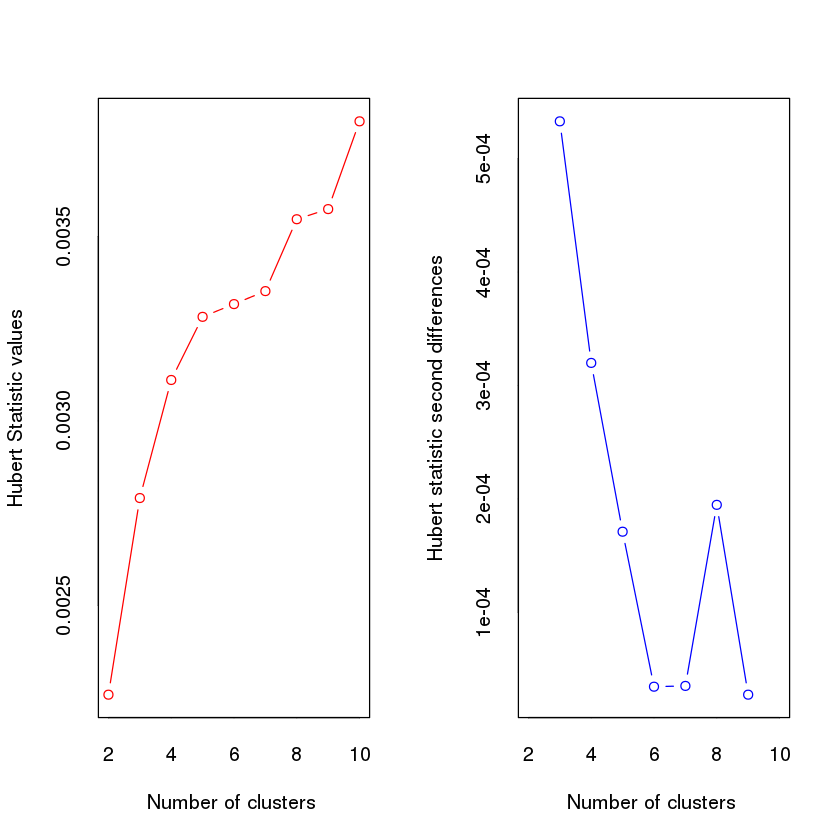

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 18 proposed 3 as the best number of clusters 
* 3 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


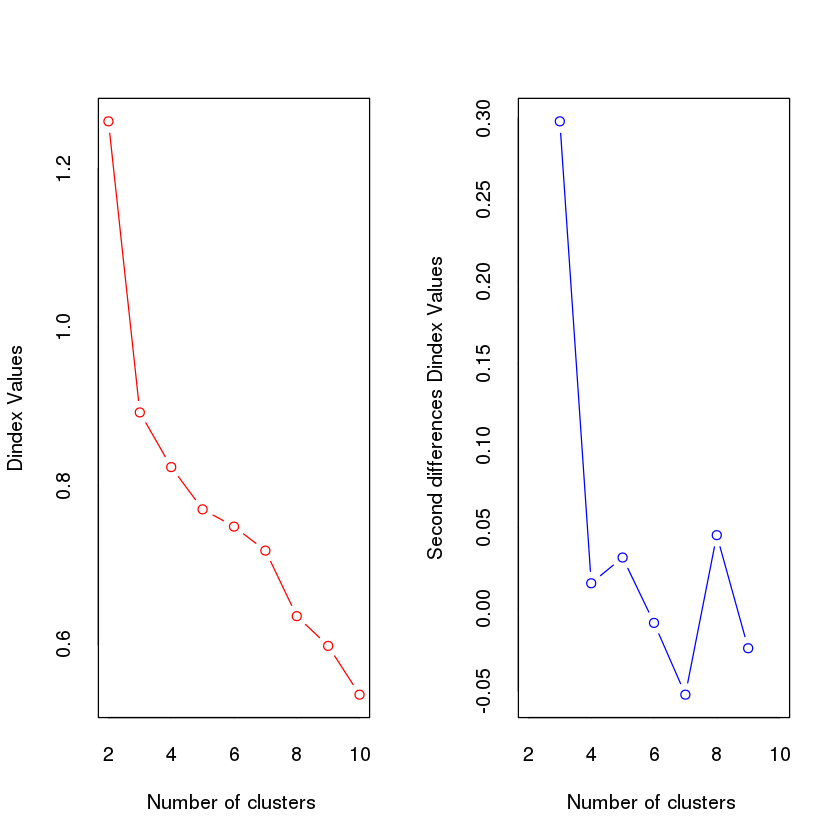

In [28]:
nb <- NbClust(iris.scaled, distance = "euclidean", min.nc = 2,
        max.nc = 10, method = "complete", index ="all")

In [29]:
# Print the result
nb

$All.index
       KL       CH Hartigan     CCC    Scott   Marriot     TrCovW   TraceW
2  1.1854 151.6332 137.0327 -1.7090 206.2459 4042610.9 11446.7289 294.3866
3  9.8471 213.0817  33.2185  3.3712 444.9163 1852776.5  1065.2914 152.8569
4  1.3651 183.9682  24.9638  2.0682 543.6783 1705121.4   900.8342 124.6818
5  2.2951 166.6596  10.6281  0.4146 592.5766 1923092.4   562.5608 106.4760
6  2.7125 144.2243  12.7058 -0.7426 633.8818 2102673.6   558.6742  99.2046
7  0.0462 131.9862  39.5776 -1.2574 662.7020 2361686.4   432.8320  91.1610
8  2.7803 149.0463  19.9304  1.3079 781.5413 1396790.2   430.6392  71.3999
9  0.5276 150.1464  32.3094  2.0036 848.5792 1130685.4   285.0416  62.6120
10 2.6428 166.4470  16.6788  4.1139 922.7090  851586.6   199.1249  50.9395
   Friedman   Rubin Cindex     DB Silhouette   Duda Pseudot2  Beale Ratkowsky
2   38.3959  2.0245 0.2978 0.9735     0.4408 0.2934 170.9649 5.7326    0.4606
3   53.5029  3.8991 0.3247 0.8581     0.4496 0.7005  32.0629 1.0185    0.4958
4   63.1994  4.7802 0.3085 0.9581     0.4106 0.5462  39.0434 1.9637    0.4431
5   64.5874  5.5975 0.3486 0.9262     0.3521 0.6102  14.0540 1.4752    0.4047
6   71.9579  6.0078 0.3922 0.9569     0.3107 0.3089  20.1316 4.8602    0.3722
7   72.7720  6.5379 0.4288 0.8597     0.3076 0.6359  36.6526 1.3613    0.3476
8   80.5472  8.3474 0.3937 0.9451     0.3303 0.6792  19.8416 1.1140    0.3314
9   85.6861  9.5189 0.3828 0.9766     0.3421 0.4147  56.4663 3.3249    0.3151
10  89.4399 11.7002 0.3895 0.9858     0.3266 0.5931  18.5213 1.5969    0.3023
       Ball Ptbiserial   Frey McClain   Dunn Hubert SDindex Dindex   SDbw
2  147.1933     0.5970 0.0616  0.5265 0.0412 0.0023  2.0088 1.2595 1.1052
3   50.9523     0.7169 0.7401  0.6296 0.0580 0.0028  1.5641 0.8925 0.3975
4   31.1704     0.7030 0.8948  0.7655 0.0623 0.0031  1.8915 0.8236 0.4585
5   21.2952     0.6892 1.3879  0.8368 0.0740 0.0033  1.5738 0.7703 0.3046
6   16.5341     0.6817 0.4503  0.8664 0.0842 0.0033  1.8071 0.7485 0.2503
7   13.0230     0.6815 1.1435  0.8708 0.0927 0.0034  1.6904 0.7183 0.1602
8    8.9250     0.5977 1.0644  1.2698 0.0990 0.0035  1.9843 0.6356 0.1434
9    6.9569     0.5491 0.8307  1.5619 0.1044 0.0036  2.4947 0.5981 0.1335
10   5.0939     0.4938 0.5605  1.9793 0.1185 0.0038  2.3764 0.5367 0.1031

$All.CriticalValues
   CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2          0.6044            46.4793       0.0002
3          0.6106            47.8328       0.3979
4          0.5522            38.1140       0.1017
5          0.4284            29.3527       0.2166
6          0.2316            29.8538       0.0031
7          0.5921            44.0831       0.2478
8          0.5362            36.3229       0.3517
9          0.5291            35.6039       0.0120
10         0.4656            30.9841       0.1804

$Best.nc
                    KL       CH Hartigan     CCC    Scott Marriot   TrCovW
Number_clusters 3.0000   3.0000   3.0000 10.0000   3.0000       3     3.00
Value_Index     9.8471 213.0817 103.8142  4.1139 238.6703 2042179 10381.44
                  TraceW Friedman   Rubin Cindex     DB Silhouette   Duda
Number_clusters   3.0000    3.000  3.0000 2.0000 3.0000     3.0000 3.0000
Value_Index     113.3546   15.107 -0.9934 0.2978 0.8581     0.4496 0.7005
                PseudoT2  Beale Ratkowsky   Ball PtBiserial Frey McClain
Number_clusters   3.0000 3.0000    3.0000  3.000     3.0000    1  2.0000
Value_Index      32.0629 1.0185    0.4958 96.241     0.7169   NA  0.5265
                   Dunn Hubert SDindex Dindex    SDbw
Number_clusters 10.0000      0  3.0000      0 10.0000
Value_Index      0.1185      0  1.5641      0  0.1031

$Best.partition
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 3 3 3 2 2 2 3 3 3 3
 [75] 3 3 3 3 3 2 2 2 2 3 3 3 3 2 3 2 2 3 2 2 2 3 3 3 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

It’s possible to visualize the result using the function **fviz_nbclust()** [in **factoextra**], as follow:

Among all indices: 
* 2 proposed  0 as the best number of clusters
* 1 proposed  1 as the best number of clusters
* 2 proposed  2 as the best number of clusters
* 18 proposed  3 as the best number of clusters
* 3 proposed  10 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  3 .



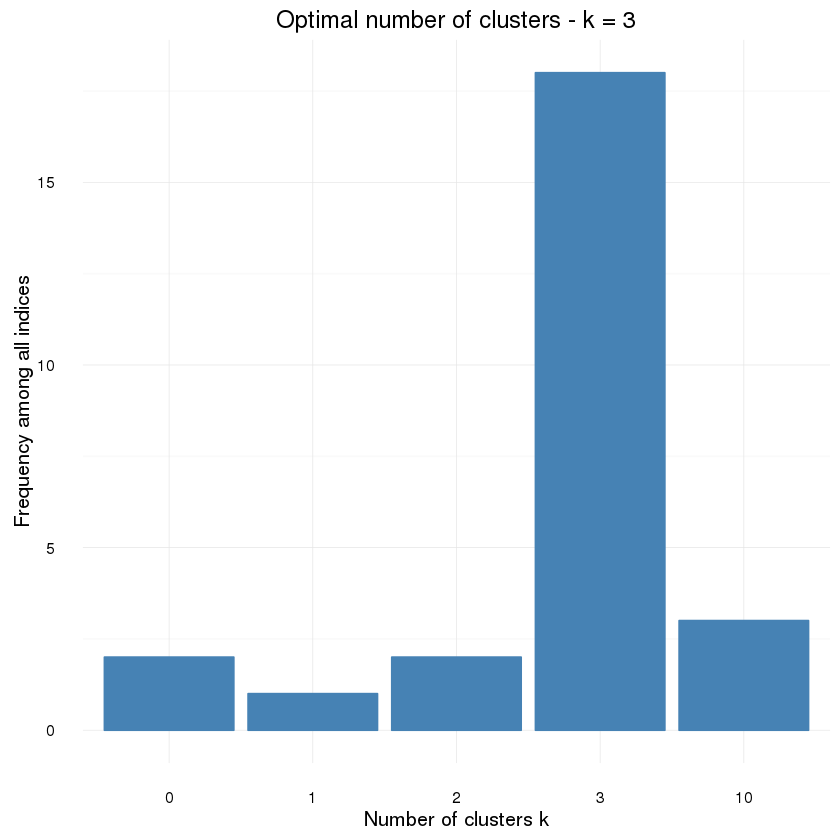

In [30]:
fviz_nbclust(nb) + theme_minimal()